In [63]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [4]:
df.shape

(3000, 14)

In [5]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [7]:
df = df.drop(['Id'], axis = 1)
df

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [9]:
# Converting objects into columns

df['roof'] = df['roof'].astype('category')
df['Grade'] = df['Grade'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Area(total)     3000 non-null   int64   
 1   Trooms          3000 non-null   int64   
 2   Nbedrooms       3000 non-null   int64   
 3   Nbwashrooms     3000 non-null   int64   
 4   Twashrooms      3000 non-null   int64   
 5   roof            3000 non-null   category
 6   Roof(Area)      3000 non-null   int64   
 7   Lawn(Area)      3000 non-null   int64   
 8   Nfloors         3000 non-null   int64   
 9   API             3000 non-null   int64   
 10  ANB             3000 non-null   int64   
 11  Expected price  3000 non-null   int64   
 12  Grade           3000 non-null   category
dtypes: category(2), int64(11)
memory usage: 264.1 KB


In [12]:
# Saparating Categorical and Continuous columns

a = df.select_dtypes(exclude = 'category')
b = df.select_dtypes(include = 'category')

a_lst = list(a.columns)
b_lst = list(b.columns)

table = [b_lst, a_lst]

print(tabulate({'Categorical':b_lst, 'Continuous':a_lst}, 
               headers = ['categorical', 'continuous']))

categorical    continuous
-------------  --------------
roof           Area(total)
Grade          Trooms
               Nbedrooms
               Nbwashrooms
               Twashrooms
               Roof(Area)
               Lawn(Area)
               Nfloors
               API
               ANB
               Expected price


#### EDA

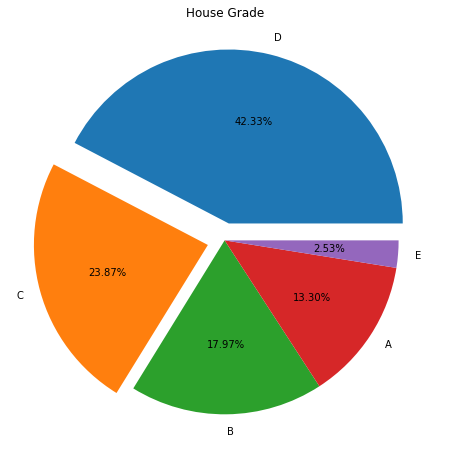

In [16]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title("House Grade")
percentage = df['Grade'].value_counts()
labels = list(df['Grade'].value_counts().index)
plt.pie(percentage, labels = labels, autopct = '%0.2f%%', explode = (0.1,0.1,0,0,0))
plt.show()

Text(0.5, 1.0, 'Expected Price')

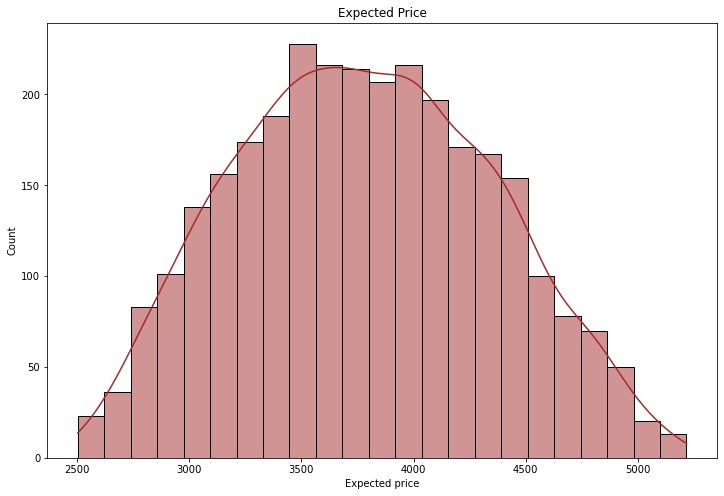

In [28]:
plt.figure(figsize = (12,8))
sns.histplot(x = df['Expected price'], kde = True, color = 'brown')
plt.title("Expected Price")

Text(0.5, 1.0, 'Grade and Trooms')

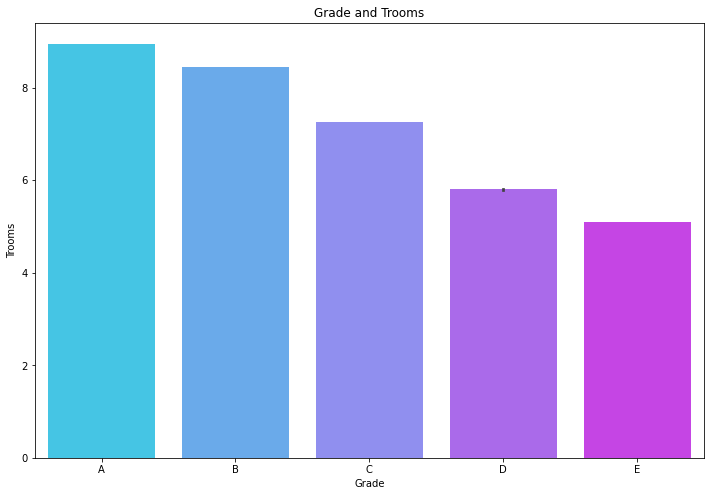

In [27]:
plt.figure(figsize = (12,8))
sns.barplot(data = df, x = 'Grade', y = 'Trooms', palette = 'cool', ci = True)
plt.title("Grade and Trooms")

Text(0.5, 1.0, 'Grade and Expected Price')

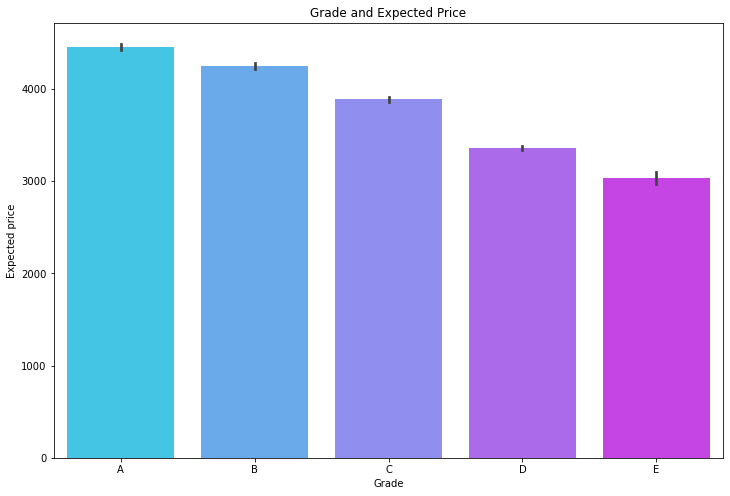

In [29]:
plt.figure(figsize = (12,8))
sns.barplot(data = df, x = 'Grade', y = 'Expected price', palette = 'cool')
plt.title("Grade and Expected Price")

Text(0.5, 1.0, 'Grade vs Expected Price with respect to Trooms')

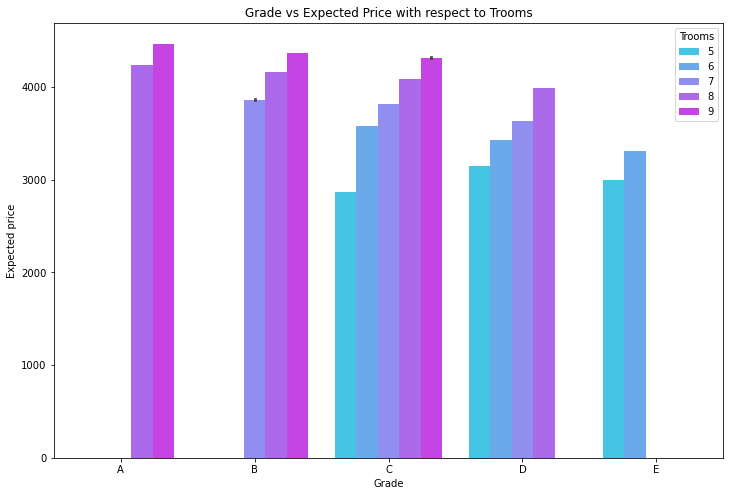

In [25]:
plt.figure(figsize = (12,8))
sns.barplot(data = df, x = 'Grade', y = 'Expected price', hue = 'Trooms', ci = True, palette = 'cool')
plt.title("Grade vs Expected Price with respect to Trooms")

Text(0.5, 1.0, 'Grade vs Expected Price with respect to Nfloors')

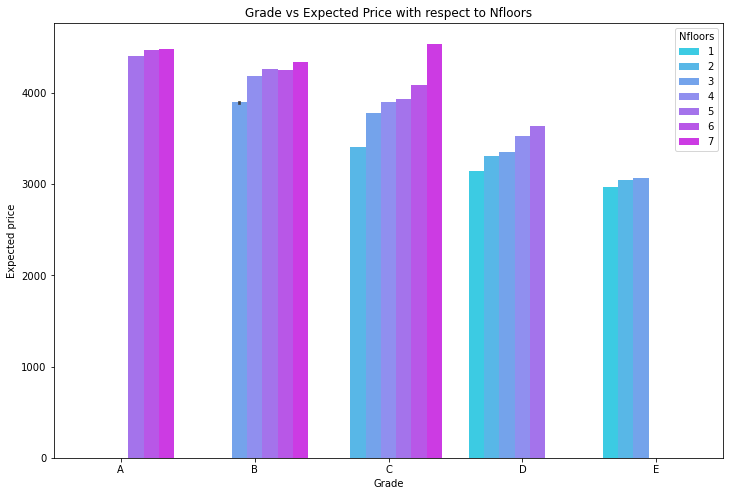

In [26]:
plt.figure(figsize = (12,8))
sns.barplot(data = df, x = 'Grade', y = 'Expected price', hue = 'Nfloors', ci = True, palette = 'cool')
plt.title("Grade vs Expected Price with respect to Nfloors")

Text(0.5, 1.0, 'Grade and Lawn-Area')

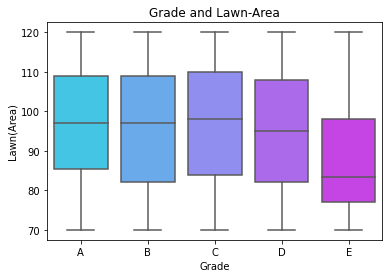

In [32]:
plt.plot(figsize = (12,8))
sns.boxplot(x = df['Grade'] , y = df['Lawn(Area)'], palette = 'cool')
plt.title("Grade and Lawn-Area")

#### Label Encoder

In [33]:
lb_en = preprocessing.LabelEncoder()
df['roof'] = lb_en.fit_transform(df['roof'])
df['Grade'] = lb_en.fit_transform(df['Grade'])
df

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,320,7,4,4,5,0,0,75,3,40,1,3843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,1,95,115,5,90,2,4246,1
2996,292,9,8,7,8,1,116,87,7,97,4,3753,0
2997,328,7,4,3,5,0,0,78,5,95,6,3607,3
2998,293,9,7,7,8,0,0,78,7,51,3,4198,1


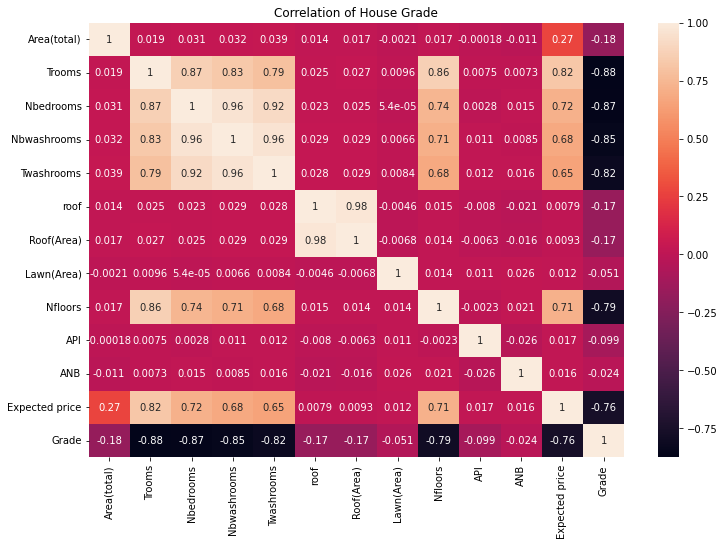

In [35]:
plt.figure(figsize = (12,8))
cor = sns.heatmap(df.corr(), annot = True)
cor.set_title("Correlation of House Grade");

In [42]:
# Separating Dependent Columns to Independent Columns

x = df.drop(columns = 'Grade').to_numpy()
y = df['Grade'].to_numpy()

In [43]:
# Splitting Data

cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 3, random_state = 1)
for train, test in cv.split(x,y):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]

In [44]:
print('X-Train values :',x_train.shape)
print('X-Test values :',x_test.shape)
print('Y-Train values :',y_train.shape)
print('Y-Test values :',y_test.shape)

X-Train values : (2000, 12)
X-Test values : (1000, 12)
Y-Train values : (2000,)
Y-Test values : (1000,)


#### Logistic Regression

In [45]:
model = LogisticRegression()
classifier = model.fit(x_train, y_train)     # fit the model
y_pred = classifier.predict(x_test)          # predicting the values
y_pred 

array([3, 2, 1, 3, 1, 3, 1, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 3,
       2, 3, 1, 2, 3, 3, 1, 2, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 1, 3, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 1, 3, 2, 2, 2, 2, 3, 0,
       3, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 0, 2, 3, 0, 1, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 3, 3, 3, 1, 2, 3, 3, 2, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 3,
       2, 3, 1, 0, 2, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 0, 2, 0, 3, 3, 3,
       3, 0, 3, 3, 2, 0, 3, 3, 3, 1, 1, 2, 3, 3, 1, 1, 2, 2, 2, 1, 3, 2,
       3, 3, 3, 3, 0, 2, 0, 2, 2, 3, 3, 0, 0, 0, 2, 2, 3, 2, 2, 2, 2, 3,
       3, 3, 0, 0, 1, 1, 0, 0, 2, 3, 0, 0, 3, 3, 1, 3, 3, 3, 1, 0, 2, 1,
       3, 3, 3, 2, 1, 3, 2, 1, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 1, 3, 1, 0,
       3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 3, 0, 3, 2, 3, 0, 3, 3, 2, 3, 3, 1,
       3, 0, 2, 0, 3, 3, 2, 0, 3, 2, 3, 1, 3, 3, 3, 1, 3, 3, 0, 1, 3, 1,
       0, 1, 3, 1, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 2, 3, 0,
       3, 3, 3, 1, 1, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3,

In [48]:
scoring = ['f1_weighted','accuracy','precision_weighted','recall_weighted']
scores = cross_validate(model, x, y, scoring = scoring, cv = cv) # model evaluation

In [52]:
ms1 = (scores['test_accuracy'])
ms2 = (scores['test_f1_weighted'])
ms3 = (scores['test_precision_weighted'])
ms4 = (scores['test_recall_weighted'])

print(f'''Accuracy:{mean(ms1)}\nF1-Score:{mean(ms2)}\nPrecision:{mean(ms3)}\nRecall:{mean(ms4)}''')

Accuracy:0.5452222222222223
F1-Score:0.5226535319227916
Precision:0.5077136775999471
Recall:0.5452222222222223


In [53]:
print(scores)

{'fit_time': array([0.23561525, 0.19653893, 0.2236011 , 0.20817518, 0.26037931,
       0.20300817, 0.2265048 , 0.22133708, 0.21557403]), 'score_time': array([0.03243303, 0.01677966, 0.02201009, 0.01782441, 0.02228951,
       0.01676512, 0.0092566 , 0.00575638, 0.00712061]), 'test_f1_weighted': array([0.51448987, 0.51452575, 0.52110987, 0.52300714, 0.53167476,
       0.5186885 , 0.52616717, 0.5333749 , 0.52084383]), 'test_accuracy': array([0.537, 0.537, 0.548, 0.549, 0.555, 0.537, 0.545, 0.555, 0.544]), 'test_precision_weighted': array([0.49849116, 0.50003042, 0.50516697, 0.50687922, 0.51718497,
       0.50526385, 0.51283031, 0.51824702, 0.50532918]), 'test_recall_weighted': array([0.537, 0.537, 0.548, 0.549, 0.555, 0.537, 0.545, 0.555, 0.544])}


#### Random Forest Classifier

In [54]:
model1 = RandomForestClassifier()
classifier1 = model1.fit(x_train, y_train)      # fit the model
y_pred1 = classifier1.predict(x_test)           # predicting the values
y_pred1 

array([3, 3, 0, 4, 1, 3, 0, 3, 1, 3, 1, 1, 2, 0, 1, 0, 2, 3, 3, 3, 3, 3,
       1, 3, 0, 2, 2, 4, 2, 2, 3, 2, 3, 0, 3, 3, 1, 3, 3, 4, 2, 2, 3, 3,
       1, 4, 2, 3, 3, 3, 1, 3, 2, 2, 1, 3, 2, 3, 1, 3, 1, 1, 2, 1, 3, 0,
       3, 3, 1, 3, 3, 1, 1, 3, 3, 2, 2, 0, 2, 4, 0, 0, 3, 3, 3, 3, 3, 0,
       2, 3, 2, 3, 3, 3, 0, 2, 3, 2, 3, 1, 1, 3, 0, 0, 2, 1, 0, 3, 2, 3,
       0, 3, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 3, 4, 0, 2, 0, 2, 1, 3,
       3, 2, 3, 3, 3, 1, 3, 3, 2, 1, 1, 2, 3, 3, 1, 1, 2, 2, 1, 1, 3, 1,
       3, 3, 3, 3, 0, 2, 1, 3, 3, 3, 3, 0, 0, 0, 1, 3, 3, 1, 2, 0, 2, 3,
       3, 2, 0, 1, 2, 2, 0, 1, 2, 3, 0, 0, 3, 3, 1, 3, 3, 2, 1, 0, 1, 3,
       3, 3, 3, 2, 1, 1, 3, 0, 0, 1, 0, 2, 1, 2, 3, 3, 3, 3, 1, 3, 1, 2,
       2, 3, 3, 0, 3, 3, 3, 3, 2, 0, 3, 0, 3, 2, 3, 0, 3, 3, 1, 3, 3, 2,
       3, 1, 1, 2, 3, 2, 1, 0, 3, 2, 3, 0, 3, 2, 2, 1, 3, 2, 0, 0, 2, 0,
       1, 0, 3, 0, 0, 3, 1, 3, 3, 3, 3, 0, 3, 3, 1, 3, 1, 3, 1, 0, 3, 0,
       3, 3, 3, 0, 1, 2, 1, 3, 3, 2, 3, 3, 2, 4, 3,

In [55]:
scores1 = cross_validate(model1, x, y, scoring = scoring, cv = cv)    # model evaluation

In [56]:
ms11 = (scores1['test_accuracy'])
ms21 = (scores1['test_f1_weighted'])
ms31 = (scores1['test_precision_weighted'])
ms41 = (scores1['test_recall_weighted'])

print(f'''Accuracy : {mean(ms11)}\nF1-Score : {mean(ms21)}\nPrecision : {mean(ms31)}\nRecall : {mean(ms41)}''')

Accuracy : 0.8938888888888888
F1-Score : 0.8907718146920084
Precision : 0.8948137844680164
Recall : 0.8938888888888888


#### AdaBoost Classifier

In [57]:
model2 = AdaBoostClassifier()
classifier2 = model2.fit(x_train, y_train)     # fit the model
y_pred2 = classifier2.predict(x_test)          # predicting the values
y_pred2 

array([3, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 2, 1, 1, 1, 1, 4, 4, 3, 3, 3,
       1, 3, 1, 2, 2, 4, 2, 3, 3, 2, 4, 1, 4, 3, 1, 3, 3, 4, 3, 3, 3, 4,
       1, 4, 2, 4, 4, 3, 1, 3, 1, 1, 1, 3, 2, 3, 2, 3, 1, 1, 3, 1, 4, 1,
       3, 4, 1, 3, 3, 1, 1, 4, 3, 3, 3, 1, 2, 3, 1, 1, 3, 4, 4, 4, 3, 1,
       2, 3, 3, 3, 3, 3, 1, 2, 3, 2, 3, 1, 1, 3, 1, 1, 2, 1, 1, 3, 2, 4,
       1, 3, 2, 1, 3, 3, 3, 3, 2, 2, 3, 1, 2, 3, 3, 4, 1, 1, 1, 2, 1, 3,
       3, 2, 3, 3, 3, 1, 3, 3, 2, 1, 1, 2, 3, 3, 1, 1, 2, 1, 1, 1, 4, 1,
       4, 3, 4, 3, 1, 3, 1, 3, 3, 3, 4, 1, 1, 1, 1, 2, 3, 1, 3, 1, 2, 3,
       3, 3, 1, 1, 2, 2, 1, 1, 2, 4, 1, 1, 3, 3, 1, 3, 3, 2, 1, 1, 1, 3,
       4, 3, 4, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 3, 4, 4, 3, 3, 1, 3, 1, 1,
       2, 3, 2, 1, 3, 4, 3, 4, 1, 1, 3, 1, 3, 3, 4, 1, 4, 4, 1, 3, 3, 2,
       4, 1, 2, 1, 3, 2, 1, 1, 3, 2, 4, 1, 3, 1, 3, 1, 4, 3, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 4, 1, 4, 3, 4, 4, 1, 4, 3, 1, 4, 1, 3, 1, 1, 3, 1,
       3, 3, 3, 1, 1, 2, 1, 4, 3, 3, 4, 3, 1, 4, 3,

In [58]:
scores2 = cross_validate(model2, x, y, scoring = scoring, cv = cv)     # model evaluation

In [59]:
ms12 = (scores2['test_accuracy'])
ms22 = (scores2['test_f1_weighted'])
ms32 = (scores2['test_precision_weighted'])
ms42 = (scores2['test_recall_weighted'])

print(f'''Accuracy : {mean(ms12)}\nF1-Score : {mean(ms22)}\nPrecision : {mean(ms32)}\nRecall : {mean(ms42)}''')

Accuracy : 0.6242222222222222
F1-Score : 0.6000274267374924
Precision : 0.6281635304370883
Recall : 0.6242222222222222


#### Stacking Classifier

In [64]:
estimate = [('lr',LogisticRegression()), ('knn',KNeighborsClassifier()), ('tree',DecisionTreeClassifier()), ('svm',SVC()), ('bayes', GaussianNB())]
final_estimate = LogisticRegression()
model3 = StackingClassifier(estimators = estimate, final_estimator = final_estimate, cv = 3) 
classifier3 = model3.fit(x_train, y_train)       # fit the model
y_pred3 = classifier3.predict(x_test)            # predicting the values
y_pred3 

array([3, 3, 0, 4, 1, 3, 0, 3, 1, 3, 1, 1, 2, 0, 1, 0, 2, 3, 3, 3, 3, 3,
       1, 3, 0, 2, 2, 3, 2, 2, 2, 2, 3, 0, 3, 3, 1, 3, 3, 4, 2, 2, 3, 3,
       1, 4, 2, 3, 3, 3, 1, 3, 1, 2, 1, 3, 2, 3, 2, 3, 1, 1, 3, 0, 3, 0,
       3, 3, 1, 3, 2, 1, 1, 3, 3, 3, 2, 0, 2, 4, 0, 0, 3, 3, 3, 3, 3, 0,
       2, 3, 2, 3, 3, 3, 0, 2, 3, 2, 3, 1, 1, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       0, 3, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 3, 3, 0, 2, 0, 3, 1, 3,
       3, 2, 3, 3, 3, 1, 3, 3, 2, 1, 1, 2, 3, 3, 0, 1, 2, 2, 1, 1, 3, 1,
       3, 3, 3, 3, 0, 2, 1, 3, 3, 3, 3, 0, 0, 0, 1, 3, 3, 1, 2, 0, 2, 3,
       3, 2, 0, 1, 2, 2, 0, 1, 2, 3, 0, 0, 3, 3, 1, 3, 3, 2, 1, 0, 1, 3,
       3, 3, 3, 2, 0, 1, 3, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 1, 2,
       3, 3, 2, 0, 3, 3, 3, 3, 2, 0, 3, 0, 2, 3, 3, 0, 3, 3, 1, 3, 3, 2,
       3, 1, 1, 2, 3, 2, 1, 0, 3, 2, 3, 0, 3, 2, 2, 1, 3, 2, 0, 0, 2, 0,
       1, 0, 3, 0, 0, 3, 1, 3, 3, 3, 3, 0, 3, 3, 1, 4, 1, 3, 1, 0, 3, 0,
       3, 3, 3, 0, 0, 2, 1, 3, 2, 2, 3, 3, 2, 4, 3,

In [65]:
scores3 = cross_validate(model3, x, y, scoring = scoring, cv = cv)     # model evaluation

In [66]:
ms13 = (scores3['test_accuracy'])
ms23 = (scores3['test_f1_weighted'])
ms33 = (scores3['test_precision_weighted'])
ms43 = (scores3['test_recall_weighted'])

print(f'''Accuracy : {mean(ms13)}\nF1-Score : {mean(ms23)}\nPrecision : {mean(ms33)}\nRecall : {mean(ms43)}''')

Accuracy : 0.8643333333333333
F1-Score : 0.8632242189881622
Precision : 0.8639031348368424
Recall : 0.8643333333333333


#### Tabulation

In [67]:
All = pd.DataFrame()
All['Model'] = ['Logistic Regression','Random Forest Classifier','ADA Boost Classifier','Stacking Classifier']
All['Accuracy'] = [mean(ms1),mean(ms11),mean(ms12),mean(ms13)]
All['F1-Score'] = [mean(ms2),mean(ms21),mean(ms22),mean(ms23)]
All['Precison'] = [mean(ms3),mean(ms31),mean(ms32),mean(ms33)]
All['Recall'] = [mean(ms4),mean(ms41),mean(ms42),mean(ms43)]
All

,Model,Accuracy,F1-Score,Precison,Recall
0,Logistic Regression,0.545222,0.522654,0.507714,0.545222
1,Random Forest Classifier,0.893889,0.890772,0.894814,0.893889
2,ADA Boost Classifier,0.624222,0.600027,0.628164,0.624222
3,Stacking Classifier,0.864333,0.863224,0.863903,0.864333


#### Visualization

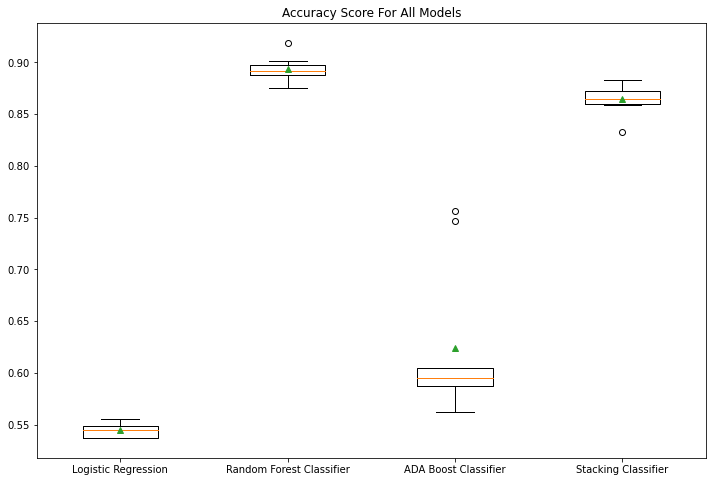

In [69]:
mods = ['Logistic Regression','Random Forest Classifier','ADA Boost Classifier','Stacking Classifier']
fig, ax = plt.subplots(figsize = (12, 8))
plt.title('Accuracy Score For All Models')
plt.boxplot([ms1,ms11,ms12,ms13], labels = mods, showmeans = True)
plt.show()

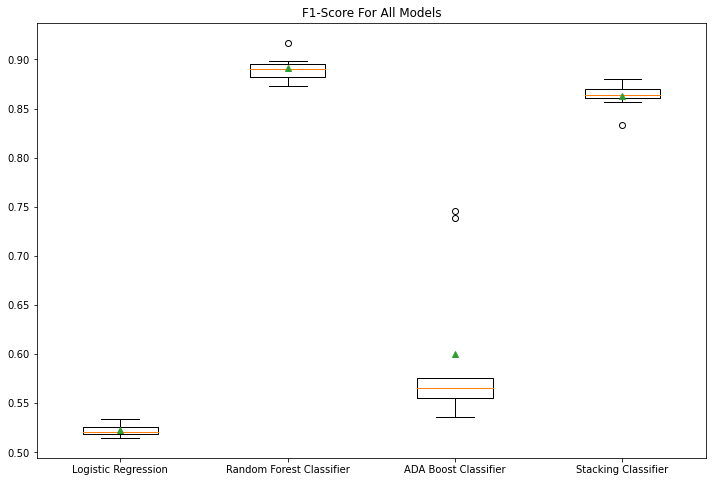

In [70]:
mods = ['Logistic Regression','Random Forest Classifier','ADA Boost Classifier','Stacking Classifier']
fig, ax = plt.subplots(figsize = (12, 8))
plt.title('F1-Score For All Models')
plt.boxplot([ms2,ms21,ms22,ms23], labels = mods, showmeans = True)
plt.show()

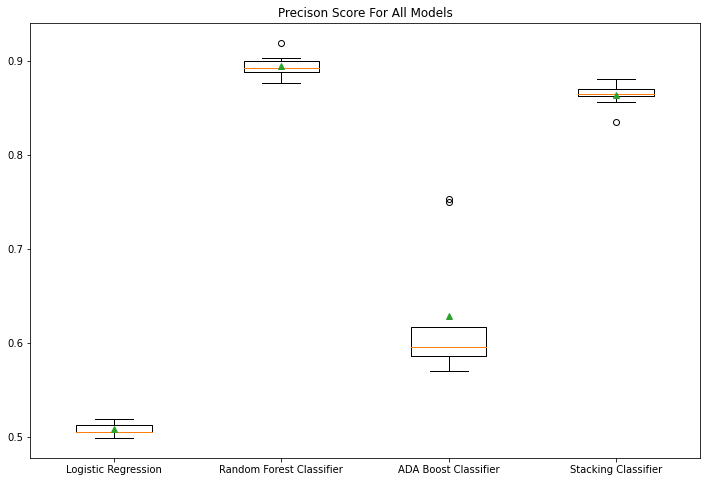

In [71]:
mods = ['Logistic Regression','Random Forest Classifier','ADA Boost Classifier','Stacking Classifier']
fig, ax = plt.subplots(figsize = (12, 8))
plt.title('Precison Score For All Models')
plt.boxplot([ms3,ms31,ms32,ms33], labels = mods, showmeans = True)
plt.show()

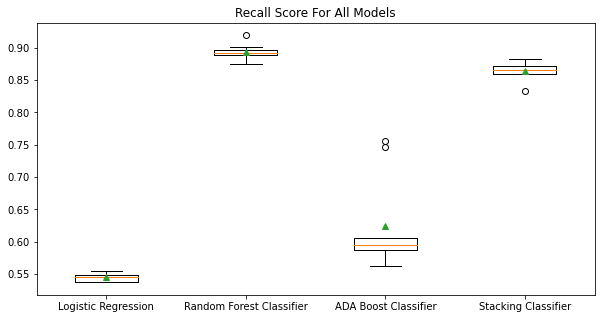

In [72]:
mods = ['Logistic Regression','Random Forest Classifier','ADA Boost Classifier','Stacking Classifier']
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Recall Score For All Models')
plt.boxplot([ms4,ms41,ms42,ms43], labels = mods, showmeans = True)
plt.show()

#### Conclusion :
    * I have used 4 models where as Logistic Regression, Random Forest Classifier, AdaBoost Classifier, Stacking Classifier
    * We can observe that Random Forest Classifier and Stacking Classifier are performing well in accuracy, f1-score, precision and recall score
    * Finally, we are considering Random Forest Classifier as a good performer in this data with Accuracy : 0.893889, f1-score : 0.890772, precision : 0.894814, recall score : 0.893889